<a href="https://colab.research.google.com/github/janpeter19/BPL_TEST2_Perfusion/blob/main/BPL_TEST2_Perfusion_fmpy_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_TEST2_Perfusion script with FMPy

The key library FMPy is installed.

After the installation a small application BPL_TEST2_Perfusion is loaded and run. You can continue with this example if you like.

In [1]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


In [2]:
%env PYTHONPATH=

env: PYTHONPATH=


In [3]:
!python --version

Python 3.11.11


In [4]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py311_24.11.1-0-Linux-x86_64.sh
!chmod +x Miniconda3-py311_24.11.1-0-Linux-x86_64.sh
!bash ./Miniconda3-py311_24.11.1-0-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.11/site-packages/')

--2025-02-08 09:59:31--  https://repo.anaconda.com/miniconda/Miniconda3-py311_24.11.1-0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145900576 (139M) [application/octet-stream]
Saving to: ‘Miniconda3-py311_24.11.1-0-Linux-x86_64.sh’

Miniconda3-py311_24 100%[===================>] 139.14M   123MB/s    in 1.1s    

2025-02-08 09:59:32 (123 MB/s) - ‘Miniconda3-py311_24.11.1-0-Linux-x86_64.sh’ saved [145900576/145900576]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.


In [5]:
!conda update -n base -c defaults conda --yes

Channels:
 - defaults
Platform: linux-64
Solving environment: | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.12.31 |       h06a4308_0         128 KB
    certifi-2025.1.31          |  py311h06a4308_0         163 KB
    ------------------------------------------------------------
                                           Total:         291 KB

The following packages will be UPDATED:

  ca-certificates                     2024.11.26-h06a4308_0 --> 2024.12.31-h06a4308_0 
  certifi                         2024.8.30-py311h06a4308_0 --> 2025.1.31-py311h06a4308_0 



certifi-2025.1.31    | 163 KB    | :   0% 0/1 [00:00<?, ?it/s]
certifi-2025.1.31    | 163 KB    | : 100% 1.0/1 [00:00<00:00,  9.36it/s]               
ca-certificates-2024 | 128 KB    | :  50% 0.4997064

In [6]:
!conda --version
!python --version

conda 24.11.1
Python 3.11.11


In [7]:
!conda config --set channel_priority strict

In [8]:
!conda install -c conda-forge fmpy --yes # Install the key package

Streaming output truncated to the last 5000 lines.
python-3.11.11       | 29.2 MB   | :  15% 0.15354246838608337/1 [00:04<00:13, 16.05s/it]







mathjax-2.7.7        | 21.2 MB   | :  24% 0.2353005698102235/1 [00:04<00:09, 12.05s/it] 




libllvm19-19.1.7     | 38.3 MB   | :  17% 0.1693757589464414/1 [00:04<00:17, 21.24s/it] 






libarrow-13.0.0      | 26.6 MB   | :  23% 0.22890055060748984/1 [00:04<00:11, 15.48s/it]








libclang-cpp19.1-19. | 19.6 MB   | :  23% 0.22816321518293817/1 [00:04<00:08, 11.23s/it]





python-3.11.11       | 29.2 MB   | :  16% 0.15996236253463042/1 [00:04<00:13, 16.64s/it]







mathjax-2.7.7        | 21.2 MB   | :  24% 0.24412434117810686/1 [00:04<00:09, 12.28s/it]




libllvm19-19.1.7     | 38.3 MB   | :  17% 0.17468150561223356/1 [00:04<00:18, 22.13s/it]






libarrow-13.0.0      | 26.6 MB   | :  24% 0.2371386166961913/1 [00:04<00:11, 15.61s/it] 








libclang-cpp19.1-19. | 19.6 MB   | :  24% 0.23773649693886564/1 [00:04<00:08, 11.39s/it]






In [9]:
#!conda install -c conda-forge matplotlib --yes

In [10]:
#!conda install -c conda-forge scipy --yes

In [11]:
#!conda install -c conda-forge openpyxl --yes

In [12]:
#!conda install -c conda-forge xlrd --yes

# Notes of BPL_TEST2_Perfusion

This notebook explore perfusion cultivation in comparison with ordinary continuous cultivation (chemostat) and use comparable settings to earlier notebook. Further you see here examples of interaction with the simplified commands par(), init(), simu() etc as well as direct interaction with the FMU which is called "model" here. The last simulation is always available in the workspace and called "sim_res". Note that describe() brings mainly up from descriptive information from the Modelica code from the FMU but is complemented by some information given in the Python setup file.

Now specific installation run a simulation and notebook for that
Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_Perfusion_linux_om_me.fmu
* Setup-file - BPL_TEST2_Perfusion_fmpy_explore.py

In [13]:
%%bash
git clone https://github.com/janpeter19/BPL_TEST2_Perfusion

Cloning into 'BPL_TEST2_Perfusion'...


In [14]:
%cd BPL_TEST2_Perfusion

/content/BPL_TEST2_Perfusion


In [15]:
run -i BPL_TEST2_Perfusion_fmpy_explore.py

Linux - run FMU pre-comiled OpenModelica

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [16]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

No processDiagram.png file in the FMU, but try the file on disk.


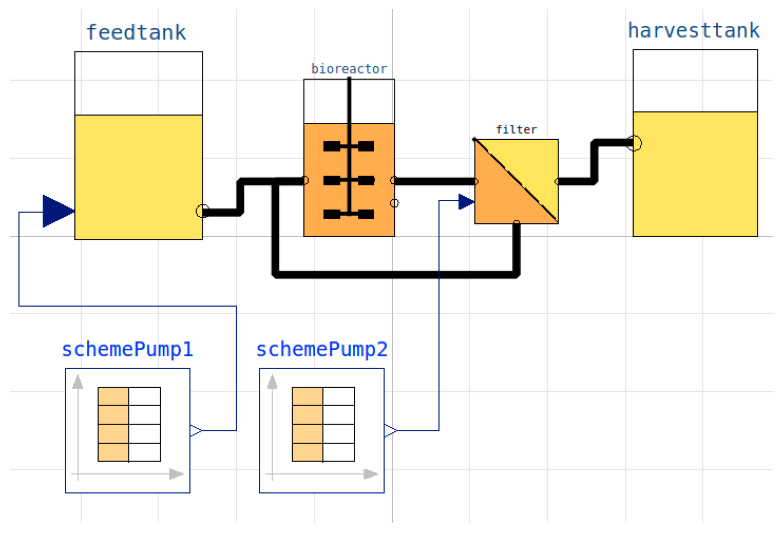

In [17]:
process_diagram()

In [18]:
# Process parameters used throughout
par(Y=0.5, qSmax=0.75, Ks=0.1)                                      # Culture
par(filter_eps=0.10, filter_alpha_X=0.02, filter_alpha_S=0.10)      # Filter
par(S_in=30.0)                                                      # Inlet substrate conc
init(V_start=1.0, VX_start=1.0)                                     # Process initial conditions that are common
eps = parDict['filter_eps']                                         # Pump schedule parameter

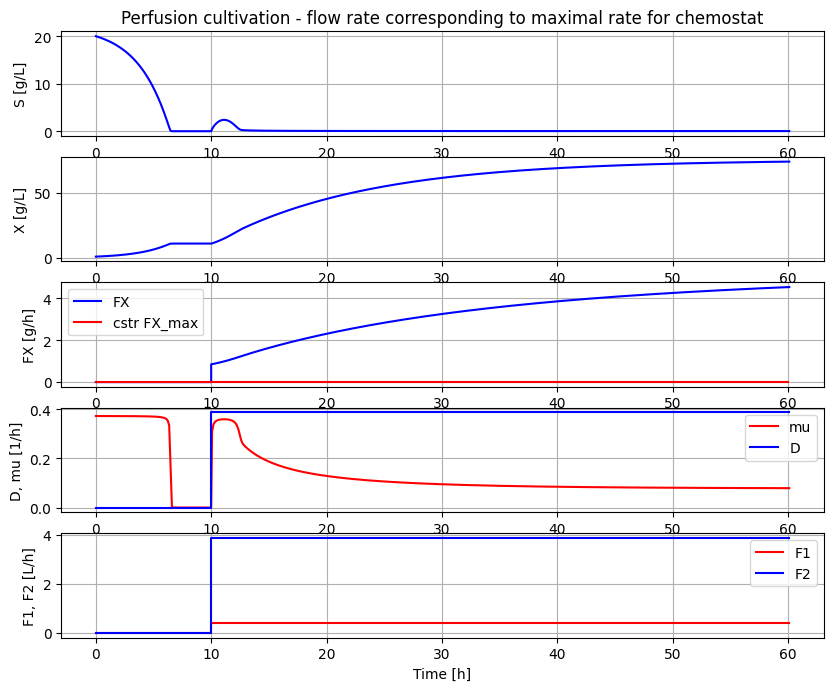

In [19]:
# Simulation of process with flow rate clot to wash-out for chemostat

init(VS_start=20)                                        # Process initial
par(pump1_t1=10, pump2_t1=10)                            # Pump schedule - recycle flow 10 times perfusion flow
par(pump1_F1=2.5*0.155, pump2_F1=2.5*0.155/eps)
par(pump1_t2=940, pump2_t2=940, pump1_t3=950, pump2_t3=950, pump1_t4=960, pump2_t4=960)

newplot(title='Perfusion cultivation - flow rate corresponding to maximal rate for chemostat')
simu(60)

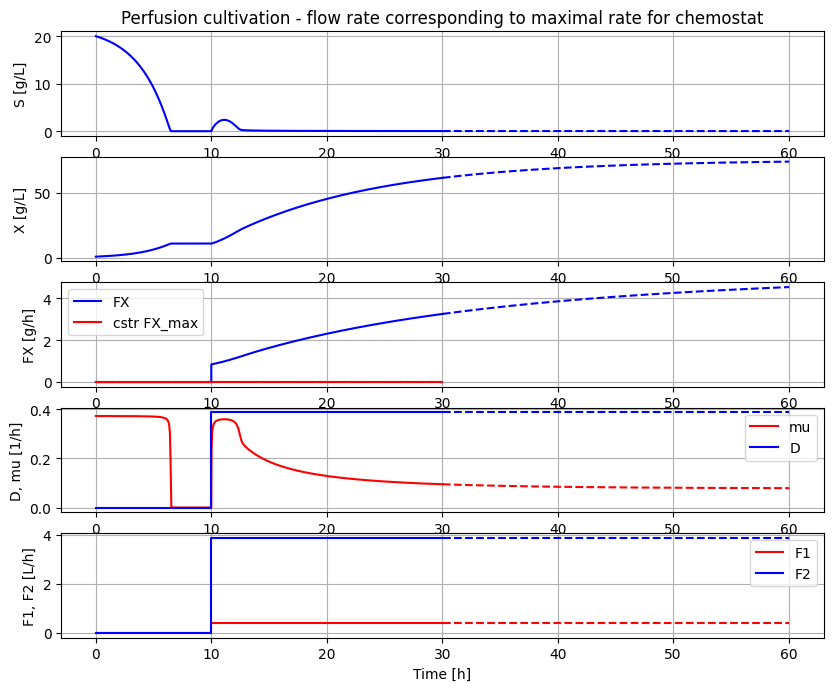

In [20]:
# Simulation of process with flow rate close to wash-out for chemostat

init(VS_start=20)                                        # Process initial
par(pump1_t1=10, pump2_t1=10)                            # Pump schedule - recycle flow 10 times perfusion flow
par(pump1_F1=2.5*0.155, pump2_F1=2.5*0.155/eps)
par(pump1_t2=940, pump2_t2=940, pump1_t3=950, pump2_t3=950, pump1_t4=960, pump2_t4=960)

newplot(title='Perfusion cultivation - flow rate corresponding to maximal rate for chemostat')
simu(30)
simu(30,'cont')

In [21]:
# Concentration factor of the filter
c=model_get('filter.retentate.c[1]')/model_get('filter.inlet.c[1]')
print('Conc factor of perfusion filter =', np.round(c,3))

Conc factor of perfusion filter = 1.179


In [22]:
c_data=sim_res['filter.retentate.c[1]']/sim_res['filter.inlet.c[1]']
print('Conc factor variation', np.round(min(c_data[151:]), 3), np.round(max(c_data[151:]),3))

Conc factor variation 1.179 1.179


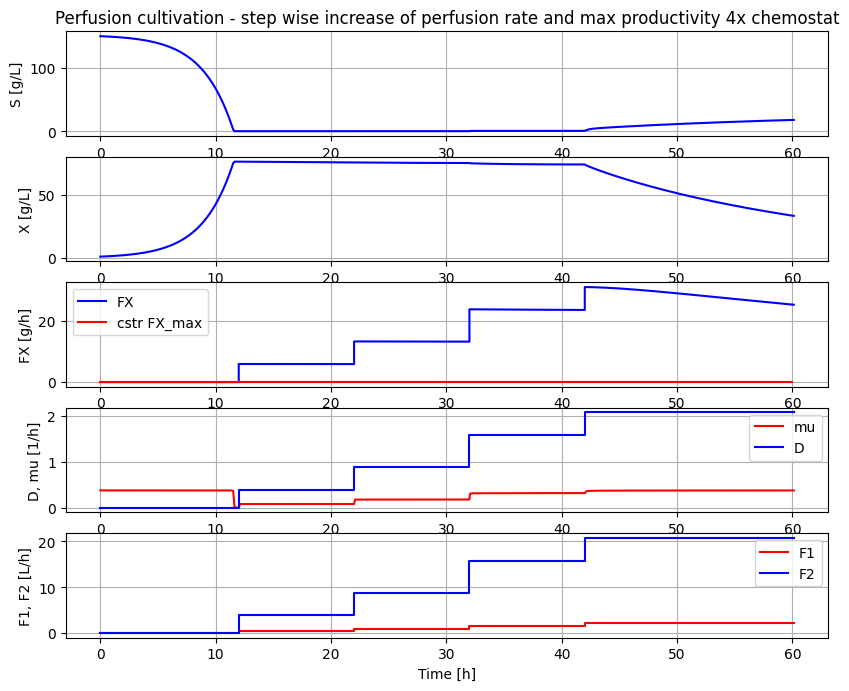

In [23]:
# Simulation of process with step-wise increase of pefusion rate until wash-out.
# This means that re-circulation rate change at the same time as the perfusion rate.

init(VS_start=150)                                       # Process initial varied

par(pump1_t1=12, pump2_t1=12)                            # Pump schedule - recycle flow 10 times perfusion flow
par(pump1_F1=2.5*0.155, pump2_F1=2.5*0.155/eps)
par(pump1_t2=22, pump2_t2=22)
par(pump1_F2=2.5*0.35, pump2_F2=2.5*0.35/eps)
par(pump1_t3=32, pump2_t3=32)
par(pump1_F3=2.5*0.63, pump2_F3=2.5*0.63/eps)
par(pump1_t4=42, pump2_t4=42)
par(pump1_F4=2.5*0.83, pump2_F4=2.5*0.83/eps)

newplot(title='Perfusion cultivation - step wise increase of perfusion rate and max productivity 4x chemostat')
simu(60)

In [24]:
# Simulation without a plot and just to check typical values at high production rate
#simu(40)
#c_data=sim_res['filter.retentate.c[1]']/sim_res['filter.inlet.c[1]']
#print('Conc factor variation', np.round(min(c_data[190:]), 3), 'to', np.round(max(c_data[190:]),3))

In [25]:
#describe('cstrProdMax')

In [26]:
# The maximal biomass productivity before washout is obtained aroudn 40 hours
np.round(model_get('harvesttank.inlet.F')*model_get('harvesttank.inlet.c[1]'),1)

25.2

In [27]:
# Thus perfusion (with this filter) brings a productivity improvement of about
np.round(23.5/5.6,1)

4.2

In [28]:
# Finally we check the filter flow rates at time 40 hour - note the negative sign for outlfow
model_get('filter.inlet.F')

20.749999999999996

In [29]:
model_get('filter.filtrate.F')

-2.0749999999999997

In [30]:
model_get('filter.retentate.F')

-18.674999999999997

## Summary
* The perfusion filter had a concentration factor of cells around 1.08 and re-cycling flow was set to a factor 10 higher than the perfusion rate and changed when perfusion rate was change to keep the ratio factor 10.
* The first simulation showed that by cell retention using perfusion filter the process could be run at a perfusion flow rate at the maximal flow rate possible for corresponding chemostat culture and cell concetration increased steadily.
* The second simulation showed that with a proper startup cell concentration, the cell concentration remained constant when perfusion rate increased in a similar way as what we see in a chemostat.
* The second simulation also showed that biomass productivity in this case was increased by a factor 4.2 compared to chemostat.
* If the perfusion rate increased to higher levels washout started but the decrase of cell concentration was slow.

Some of you who read this may have your perfusion experience with CHO-cultures. For such cultures the cell concentration do increase with increase of perfusion rate and there are understood reasons for that. But for this simplifed process as well as microbial processes they typically keep cell concentration constant when flow rate is chaged, and that under quite wide conditions. I will try come back to this phenomena in a later notebook.

In [31]:
# List of components in the process setup and also a couple of other things like liquidphase and D
describe('parts')

['bioreactor', 'bioreactor.culture', 'D', 'feedtank', 'filter', 'harvesttank', 'schemePump1', 'schemePump2']


In [32]:
describe('MSL')

MSL: 3.2.3 - used components: RealInput, RealOutput, CombiTimeTable, Types


In [33]:
system_info()


System information
 -OS: Linux
 -Python: 3.11.11
 -Scipy: not installed in the notebook
 -FMPy: 0.3.19
 -FMU by: OpenModelica Compiler OpenModelica 1.25.0~dev-133-ga5470be
 -FMI: 2.0
 -Type: ME
 -Name: BPL.Examples_TEST2.Perfusion
 -Generated: 2024-11-06T21:37:58Z
 -MSL: 3.2.3
 -Description: Bioprocess Library version 2.3.0
 -Interaction: FMU-explore for FMPy version 1.0.1
